In [1]:
from qibolab import QibolabBackend
from qiskit import QuantumRegister
import numpy as np
from gymnasium.spaces import Box
from rl_qoc import QuantumEnvironment, BenchmarkConfig
from qiskit.circuit import QuantumCircuit, ParameterVector, Gate
from qiskit.circuit.library import CZGate, RXGate, XGate
from rl_qoc import (
    QEnvConfig,
    ExecutionConfig,
    ChannelRewardConfig,
)
from rl_qoc.qibo import QiboConfig
from qiskit import pulse


def param_circuit(
    qc: QuantumCircuit, params: ParameterVector, qreg: QuantumRegister, **kwargs
):
    cz_cal = Gate("cz_cal", 2, params.params)
    with pulse.build() as cz_sched:
        pulse.play(
            pulse.Gaussian(duration=160, amp=0.5, sigma=40), pulse.DriveChannel(0)
        )
        pulse.play(
            pulse.Gaussian(duration=160, amp=0.5, sigma=40), pulse.DriveChannel(1)
        )
        pulse.shift_phase(np.pi, pulse.DriveChannel(0))
        pulse.shift_phase(np.pi, pulse.DriveChannel(1))
    qc.append(cz_cal, qreg)
    qc.add_calibration(cz_cal, [0, 1], cz_sched)

    return qc


def get_backend():
    return "qibolab"


action_space_low = np.array([0.0, 16])  # [amp, phase, phase, duration]
action_space_high = np.array([1.0, 160])  # [amp, phase, phase, duration]
action_space = Box(action_space_low, action_space_high)
qibo_config = QiboConfig(
    param_circuit, get_backend(), platform="dummy", qubit_pair=(0, 2), gate_rule="cz"
)
q_env_config = QEnvConfig(
    target={"gate": CZGate(), "physical_qubits": [0, 1]},
    backend_config=qibo_config,
    action_space=action_space,
    reward_config=ChannelRewardConfig(),
    benchmark_config=BenchmarkConfig(0),
    execution_config=ExecutionConfig(batch_size=1, sampling_paulis=50, n_shots=1000),
)

env = QuantumEnvironment(q_env_config)

/Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


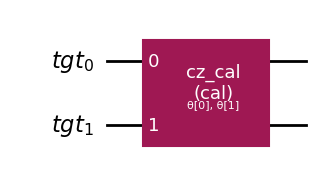

In [2]:
env.circuits[0].draw(output="mpl")

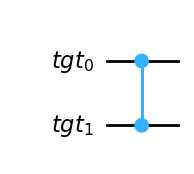

In [3]:
env.baseline_circuits[0].draw(output="mpl")

In [4]:
env.step(np.array([[0.5, 80]]))

Sending Estimator job...


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Using qibolab (dummy) backend on /CPU:0


2024-11-18 16:31:09 INFO Using qibolab (dummy) backend on /CPU:0


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x378d32b10>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x378d32b10>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to dummy instrument.


2024-11-18 16:31:09 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x378d33e90>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x378d33e90>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Minimal execution time (unrolling): 0.0261


2024-11-18 16:31:09 INFO Minimal execution time (unrolling): 0.0261


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Disconnecting dummy instrument.


2024-11-18 16:31:09 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Using qibolab (dummy) backend on /CPU:0


2024-11-18 16:31:09 INFO Using qibolab (dummy) backend on /CPU:0


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x378cb7cd0>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x378cb7cd0>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to dummy instrument.


2024-11-18 16:31:09 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x378d01c90>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x378d01c90>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Minimal execution time (unrolling): 0.022350000000000002


2024-11-18 16:31:09 INFO Minimal execution time (unrolling): 0.022350000000000002


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Disconnecting dummy instrument.


2024-11-18 16:31:09 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Using qibolab (dummy) backend on /CPU:0


2024-11-18 16:31:09 INFO Using qibolab (dummy) backend on /CPU:0


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x378d027d0>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x378d027d0>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to dummy instrument.


2024-11-18 16:31:09 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x379fae490>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x379fae490>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Minimal execution time (unrolling): 0.01332


2024-11-18 16:31:09 INFO Minimal execution time (unrolling): 0.01332


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Disconnecting dummy instrument.


2024-11-18 16:31:09 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Using qibolab (dummy) backend on /CPU:0


2024-11-18 16:31:09 INFO Using qibolab (dummy) backend on /CPU:0


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x379f17c50>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x379f17c50>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to dummy instrument.


2024-11-18 16:31:09 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x379ff3ad0>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x379ff3ad0>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Minimal execution time (unrolling): 0.004518


2024-11-18 16:31:09 INFO Minimal execution time (unrolling): 0.004518


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Disconnecting dummy instrument.


2024-11-18 16:31:09 INFO Disconnecting dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Using qibolab (dummy) backend on /CPU:0


2024-11-18 16:31:09 INFO Using qibolab (dummy) backend on /CPU:0


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Loading platform dummy


2024-11-18 16:31:09 INFO Loading platform dummy


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x378d1e8d0>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x378d1e8d0>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to dummy instrument.


2024-11-18 16:31:09 INFO Connecting to dummy instrument.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x37a069c50>.


2024-11-18 16:31:09 INFO Connecting to instrument <qibolab.instruments.dummy.DummyLocalOscillator object at 0x37a069c50>.


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Minimal execution time (unrolling): 0.00442


2024-11-18 16:31:09 INFO Minimal execution time (unrolling): 0.00442


[Qibo 0.2.13|INFO|2024-11-18 16:31:09]: Disconnecting dummy instrument.


2024-11-18 16:31:09 INFO Disconnecting dummy instrument.
Time for running 0.1763458251953125
Finished Estimator job


(array([0, 0]),
 array([-0.]),
 True,
 False,
 {'step': 0,
  'average return': -0.0013868691899070376,
  'max return': -0.0013868691899070376,
  'arg_max return': 0,
  'optimal action': array([0., 0.])})

In [5]:
backend = QibolabBackend(platform="dummy")

[Qibo 0.2.13|INFO|2024-11-18 16:31:29]: Loading platform dummy


2024-11-18 16:31:29 INFO Loading platform dummy


In [6]:
backend.platform

Platform(name='dummy', qubits={0: Qubit(name=0, bare_resonator_frequency=0, readout_frequency=5200000000.0, drive_frequency=4000000000.0, anharmonicity=0, sweetspot=0.0, asymmetry=0.0, crosstalk_matrix={0: 1}, Ec=0.0, Ej=0.0, g=0.0, assignment_fidelity=[0.5, 0.1], readout_fidelity=0.0, gate_fidelity=[0.5, 0.1], effective_temperature=0.0, peak_voltage=0, pi_pulse_amplitude=0, resonator_depletion_time=0, T1=0.0, T2=0.0, T2_spin_echo=0, state0_voltage=0, state1_voltage=0, mean_gnd_states=[0, 1], mean_exc_states=[1, 0], threshold=0.0, iq_angle=0.0, mixer_drive_g=0.0, mixer_drive_phi=0.0, mixer_readout_g=0.0, mixer_readout_phi=0.0, readout=Channel(name='readout', port=DummyPort(name='readout', offset=0.0, lo_frequency=0, lo_power=0, gain=0, attenuation=0, power_range=0, filters=None), local_oscillator=None, max_offset=None), feedback=None, twpa=Channel(name='twpa', port=None, local_oscillator=<qibolab.instruments.dummy.DummyLocalOscillator object at 0x379f2b150>, max_offset=None), drive=Cha

In [7]:
backend.platform.pairs.keys()

dict_keys([(0, 2), (2, 0), (1, 2), (2, 1), (2, 3), (3, 2), (2, 4), (4, 2)])